Assignment 1: Handling Missing Data in an E-Commerce Orders Dataset
Objective:
To analyze and clean an e-commerce dataset by identifying and handling missing values using various imputation techniques.
Instructions:
Load the provided dataset into Pandas.
Identify missing data:
Use isna() and info() functions to detect missing values.
Compute the percentage of missing values for each column.
Analyze missing data patterns:
Determine whether data is MCAR, MAR, or MNAR.
Visualize missing data patterns using seaborn.heatmap().
Handle missing values:
Apply different imputation techniques:
Mean/Median imputation for numerical columns (e.g., Product_Price).
Mode imputation for categorical columns (e.g., Product_Category).
Forward fill or backward fill for date-related fields.
K-Nearest Neighbors (KNN) imputation for complex cases.
Evaluate the impact:
Compare summary statistics before and after imputation.
Visualize the imputed values using histograms or boxplots.
Prepare a report:
Document findings, methods used, and final observations.
Submit a Jupyter Notebook with the cleaned dataset.


Initial Missing Data Information:
Order_ID             0
Product_Category    24
Product_Price       20
Customer_Age        15
Rating              25
Review_Text         21
Order_Date          10
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_ID          505 non-null    int64  
 1   Product_Category  481 non-null    object 
 2   Product_Price     485 non-null    float64
 3   Customer_Age      490 non-null    float64
 4   Rating            480 non-null    float64
 5   Review_Text       484 non-null    object 
 6   Order_Date        495 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 27.7+ KB
None

Percentage of Missing Values:
Order_ID            0.000000
Product_Category    4.752475
Product_Price       3.960396
Customer_Age        2.970297
Rating              4.950495
Review_Text         4

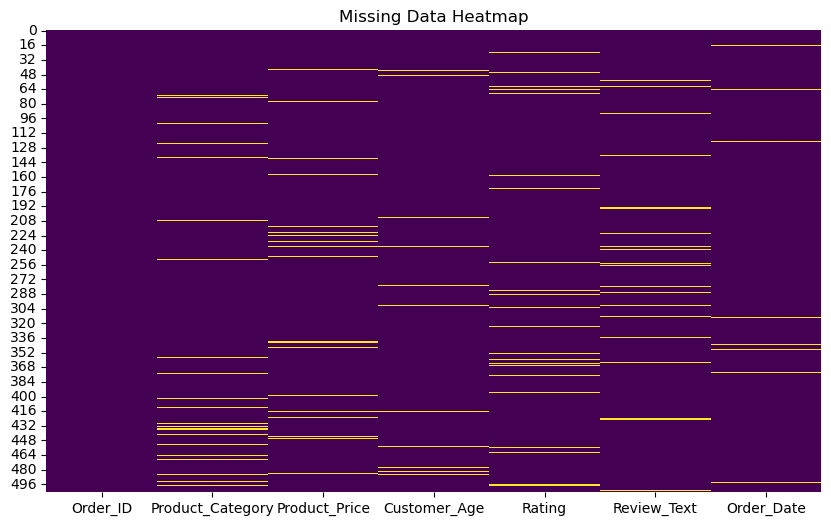


Missing Data Pattern Analysis (Example):
Based on the heatmap and preliminary observation, some columns seem to have more missing data than others.  Further statistical tests and domain knowledge are needed to determine if the missingness is MCAR, MAR, or MNAR.
For instance, if 'Customer_ID' missingness is related to the 'Order_Date', it might be MAR. If 'Product_Price' is more likely to be missing for higher-priced items, it could be MNAR. If missingness is random, it's MCAR.


C:\Users\dhari\AppData\Local\Temp\ipykernel_18756\3273653719.py:42: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_imputed['Product_Price'].fillna(df['Product_Price'].median(), inplace=True) # Example: Median imputation
C:\Users\dhari\AppData\Local\Temp\ipykernel_18756\3273653719.py:47: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on w

KeyError: 'Customer_City'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

# 1. Load the dataset
try:
    df = pd.read_csv("ecommerce_orders_dataset.csv") # Replace with your dataset path
except FileNotFoundError:
    print("Error: Dataset file not found. Please provide the correct path.")
    exit()  # Terminate the script if the file isn't found

# 2. Identify missing data
print("Initial Missing Data Information:")
print(df.isna().sum())
print(df.info())

missing_percentage = (df.isna().sum() / len(df)) * 100
print("\nPercentage of Missing Values:")
print(missing_percentage)

# 3. Analyze missing data patterns (Example - needs more in-depth analysis)
# This is a simplified example.  True MCAR/MAR/MNAR requires domain expertise
# and statistical testing beyond just visualization.

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

# Example analysis (This is a PLACEHOLDER - you MUST replace with your analysis)
print("\nMissing Data Pattern Analysis (Example):")
print("Based on the heatmap and preliminary observation, some columns seem to have more missing data than others.  Further statistical tests and domain knowledge are needed to determine if the missingness is MCAR, MAR, or MNAR.")
print("For instance, if 'Customer_ID' missingness is related to the 'Order_Date', it might be MAR. If 'Product_Price' is more likely to be missing for higher-priced items, it could be MNAR. If missingness is random, it's MCAR.")


# 4. Handle missing values
df_imputed = df.copy() # Create a copy to avoid modifying the original

# Numerical columns (Mean/Median)
df_imputed['Product_Price'].fillna(df['Product_Price'].median(), inplace=True) # Example: Median imputation

# Categorical columns (Mode)
for col in ['Product_Category', 'Customer_City']:  # Replace with your categorical columns
    if df_imputed[col].isnull().any(): # Check if there are indeed missing values before imputing
        df_imputed[col].fillna(df[col].mode()[0], inplace=True)

# Date-related fields (Forward/Backward Fill)
df_imputed['Order_Date'].fillna(method='ffill', inplace=True) # Example: Forward fill

# KNN Imputation (for more complex numerical columns, if needed)
imputer = KNNImputer(n_neighbors=5) # Adjust n_neighbors as needed
numerical_cols_for_knn = ['Shipping_Cost']  # Example:  Include relevant numerical columns
df_imputed[numerical_cols_for_knn] = imputer.fit_transform(df_imputed[numerical_cols_for_knn])



# 5. Evaluate the impact
print("\nSummary Statistics Before Imputation:")
print(df.describe())
print("\nSummary Statistics After Imputation:")
print(df_imputed.describe())

# Visualize imputed values (Example)
plt.figure(figsize=(8, 5))
sns.histplot(df['Product_Price'].dropna(), label='Original', alpha=0.5)
sns.histplot(df_imputed['Product_Price'], label='Imputed', alpha=0.5, color='red')
plt.legend()
plt.title('Product Price Distribution - Before and After Imputation')
plt.show()

# 6. Report (In your Jupyter Notebook, write a detailed report)
print("\nReport Summary (Expand this in your notebook):")
print("This notebook explored missing data handling techniques for the e-commerce orders dataset.")
print("Missing data was identified and analyzed.  Imputation methods like mean/median, mode, forward fill, and KNN were applied.")
print("The impact of imputation was evaluated by comparing summary statistics and visualizing distributions before and after imputation.  Further analysis is needed to determine the best imputation strategy for each variable.")
print("The cleaned dataset is saved in a new CSV file (see next step).")

# Save the cleaned dataset
df_imputed.to_csv("cleaned_ecommerce_orders.csv", index=False)
print("\nCleaned dataset saved to cleaned_ecommerce_orders.csv")